<a href="https://colab.research.google.com/github/tfortammi/pun-detector/blob/master/Converging_meanings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dappity Dap

### Characteristics of Puns
* Converging Meanings 
* Sound 
* Association


### Target: Converging Meanings

We have observed that puns often make use of words that have very similar meanings. For example:

'He said I was **average** - but he was just being **mean**.'

where 'average' and 'mean' have the same meanings but are expressed differently. 

___

In order to test this, we will do the following:

* Step 1: Use Synset to list synonyms of tokens
* Step 2: Find common words in Synsets within a sentence
* Step 3: Determine correlation between converging meanings & whether a sentence is a pun or not

---

Import/Download relevant packages:

In [2]:
from textblob import Word
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tammi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


For this method, we will use NLTK's WordNet corpus to find the synsets of each token in a sentence.

As an example, let's test it out on the word **'plant'** first:

In [3]:
word = Word('plant')
for i in range(3):
    print('Use Case ', i)
    print(word.synsets[i])
    print(word.definitions[i])
    print(word.synsets[i].lemma_names())
    print(' ')

Use Case  0
Synset('plant.n.01')
buildings for carrying on industrial labor
['plant', 'works', 'industrial_plant']
 
Use Case  1
Synset('plant.n.02')
(botany) a living organism lacking the power of locomotion
['plant', 'flora', 'plant_life']
 
Use Case  2
Synset('plant.n.03')
an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience
['plant']
 


Through WordNet, the **use cases** (Synsets) of the word "Plant" can be found, as well as the **definitions** and **Synonyms** (Lemma Names) as the input.

---
        
           
Let's first eyeball how relevant the lemmas of each significant word in a sentence to determining if a sentence is a pun. 

**The example we will use is: "The past, the present and the future walked into a bar. It was tense."**



In [4]:
# First, importing relevant packages, etc

import codecs
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import PunktSentenceTokenizer,sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tammi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tammi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We'll need to process the sentence, which includes lemmatizing, filtering out stop words, stripping punctuation and tokenizing the sentence.

In [5]:
def simpleFilter(sentence):
    
    '''This function filters out stopwords, lemmatizes, tokenizes, and 
    strips punctuation from the input sentence and returns the a list of 
    filtered tokens'''
    
    filtered_sent = []
    
    # Strip punctuation
    stripped = re.sub("[(.)',=?!#@]", '', sentence)
        
    # filter out stopwords 
    stop_words = set(stopwords.words("english"))
    
    # Tokenize
    words = word_tokenize(stripped)
    
    # Lemmatize and Filter out Stopwords
    lemmatizer = WordNetLemmatizer()
    for w in words:
        if w not in stop_words:
            filtered_sent.append(lemmatizer.lemmatize(w))

    return filtered_sent
  
def printLemmas(word):
    
    '''This function prints out all synonyms of a given word.'''
    
    for ss in Word(word).synsets:
        print(ss.lemma_names())
        

# Print 

s = 'The past, the present and the future walked into a bar. It was tense.'

for word in simpleFilter(s):
    print("Filtered word: '" + word + "' and its lemmas:")
    printLemmas(word)
    print()




Filtered word: 'The' and its lemmas:

Filtered word: 'past' and its lemmas:
['past', 'past_times', 'yesteryear']
['past']
['past', 'past_tense']
['past']
['past', 'preceding', 'retiring']
['by', 'past']

Filtered word: 'present' and its lemmas:
['present', 'nowadays']
['present']
['present', 'present_tense']
['show', 'demo', 'exhibit', 'present', 'demonstrate']
['present', 'represent', 'lay_out']
['stage', 'present', 'represent']
['present', 'submit']
['present', 'pose']
['award', 'present']
['give', 'gift', 'present']
['deliver', 'present']
['introduce', 'present', 'acquaint']
['portray', 'present']
['confront', 'face', 'present']
['present']
['salute', 'present']
['present']
['present']

Filtered word: 'future' and its lemmas:
['future', 'hereafter', 'futurity', 'time_to_come']
['future', 'future_tense']
['future']
['future']
['future']
['future', 'next', 'succeeding']
['future']

Filtered word: 'walked' and its lemmas:
['walk']
['walk']
['walk']
['walk']
['walk']
['walk']
['walk']
[

---
## **Hypothesis 1: Converging Meaning Pun**

We observe that the word 'tense' appears as a synonym of the words 'present', 'past', and 'future'. Since we are exploring puns with converging meanings, **we hypothesise that we are more likely to find words with converging meanings in puns than in non-puns.**

---

To do this, we first produce a list of unique synonyms of a certain word, excluding the word itself.


Let's try this on the word "plant".

In [6]:
def create_lemmas(word):
    lemmas_list = []
    for ss in Word(word).synsets:
        lemmas_list.append(ss.lemma_names())
    return lemmas_list

def process_lemmas(lemmas_list, word):
    '''
    This function process the lemma list of all the definition of a word
    and returns a list of all associated unrepeated words with the word
    '''
    all_lemmas = []
    for each_list in lemmas_list:
        for lemma in each_list:
            if lemma != word and lemma not in all_lemmas:
                all_lemmas.append(lemma)
    return all_lemmas


print(process_lemmas(create_lemmas('plant'), 'plant'))

['works', 'industrial_plant', 'flora', 'plant_life', 'set', 'implant', 'engraft', 'embed', 'imbed', 'establish', 'found', 'constitute', 'institute']


Next, we have to find out if synonyms of any word in a sentence can be found in the rest of the sentence, and count the number of times this occurs.

In [7]:
def print_common_syn(s):
    
    '''
    This function takes in a sentence, processes and tokenizes it and
    prints each significant word and tests if its synonyms can be found
    in the rest of the sentence. It prints the pair and returns the
    number of pairs found.
    '''
    
    count = 0
    
    # Filter the sentence to remove filler words / stopwords
    filtered_words = simpleFilter(s)
    
    for index, word in enumerate(filtered_words):
        if word.isalpha():
            lemma_list_of_term = process_lemmas(create_lemmas(word),word)

            # test if any word in the rest of the sentence appears in the lemma list of current word
            for other_word in filtered_words[index+1:]:
                if other_word in ' '.join(lemma_list_of_term):
                    count += 1
                    print(word, other_word)
    return count
    
    
s = 'The past, the present and the future walked into a bar. It was tense.'
print('The number of synonym pairs in this sentence is',print_common_syn(s))

past tense
present tense
future tense
The number of synonym pairs in this sentence is 3


In [8]:
def common_syn(s):
    
    '''
    This function takes in a sentence, processes and tokenizes it and
    prints each significant word and tests if its synonyms can be found
    in the rest of the sentence. It prints the pair and returns the
    number of pairs found.
    '''
    
    count = 0
    
    # Filter the sentence to remove filler words / stopwords
    filtered_words = simpleFilter(s)
    
    for index, word in enumerate(filtered_words):
        if word.isalpha():
            lemma_list_of_term = process_lemmas(create_lemmas(word),word)

            # test if any word in the rest of the sentence appears in the lemma list of current word
            for other_word in filtered_words[index+1:]:
                if other_word in ' '.join(lemma_list_of_term):
                    count += 1
    return count

In order to see if this method does work, we will test it out on our list of pre-tagged puns and non-puns where puns are tagged '0' and non-puns are tagged '1'

We import the list and apply our function common_syn to it, under the label 'Syn Count'.

In [11]:
import pandas as pd
df = pd.read_csv('puns_final.csv', encoding='latin-1')
df['Syn Count'] = df['Sentence'].apply(common_syn)
df.sample(5)

,Sentence,P/NP,Syn Count
475,Life is a culmination of the past an awareness...,0,1
329,Whenever you find yourself on the side of the ...,0,0
147,What do you call crystal clear urine? 1080pee.,1,0
260,"I would rather be a superb meteor, every atom ...",0,1
272,The first to apologize is the bravest. The fir...,0,3


To find out if this method is accurate, we use the correlation between whether the sentence is a pun or not and the Syn Count. 

In [12]:
corr = df.corr()
corr

,P/NP,Syn Count
P/NP,1.00000,-0.24147
Syn Count,-0.24147,1.00000


In this case, it appears the Syn Count is not very highly correlated with whether the sentence is a pun or not...

Perhaps we should try a different approach.

---

Other than the ability to find synonyms, WordNet can also find out a range of other details about a word.  

Let's use the words 'happy' and 'cutlery' to see what kind of details WordNet can figure out about a word.

In [14]:
print("The following are synonyms of 'happy':")
for x in get_all_synsets('happy'):
    print(x)
print()
print("The following are hyponyms (words that are more specific) of 'cutlery':")
for x in get_all_hyponyms('cutlery'):
    print(x)
print()
print("The following are similar to 'happy':")
for x in get_all_similar_tos('happy'):
    print(x)
print()
print("The following are antonyms (opposite) of 'happy':")
for x in get_all_antonyms('happy'):
    print(x)
print()
print("The following are words that should also be seen with 'happy':")
for x in get_all_also_sees('happy'):
    print(x)
 

The following are synonyms of 'happy':
('happy', 'happy.a.01')
('felicitous', 'felicitous.s.02')
('happy', 'felicitous.s.02')
('glad', 'glad.s.02')
('happy', 'glad.s.02')
('happy', 'happy.s.04')
('well-chosen', 'happy.s.04')

The following are hyponyms (words that are more specific) of 'cutlery':
('bolt_cutter', 'bolt_cutter.n.01')
('cigar_cutter', 'cigar_cutter.n.01')
('die', 'die.n.03')
('edge_tool', 'edge_tool.n.01')
('glass_cutter', 'glass_cutter.n.03')
('tile_cutter', 'tile_cutter.n.01')
('fork', 'fork.n.01')
('spoon', 'spoon.n.01')
('Spork', 'spork.n.01')
('table_knife', 'table_knife.n.01')

The following are similar to 'happy':
('blessed', 'blessed.s.06')
('blissful', 'blissful.s.01')
('bright', 'bright.s.09')
('golden', 'golden.s.02')
('halcyon', 'golden.s.02')
('prosperous', 'golden.s.02')
('laughing', 'laughing.s.01')
('riant', 'laughing.s.01')
('fortunate', 'fortunate.a.01')
('willing', 'willing.a.01')
('felicitous', 'felicitous.a.01')

The following are antonyms (opposite) 

The functions below make use of WordNet to yield synonyms, hyponyms, antonyms, words that are similar to as well as words that the WordNet corpus has recorded as "also sees".

In [13]:
from nltk.corpus import wordnet as wn

def get_all_synsets(word, pos=None):
    for ss in wn.synsets(word):
        for lemma in ss.lemma_names():
            yield (lemma, ss.name())


def get_all_hyponyms(word, pos=None):
    for ss in wn.synsets(word, pos=pos):
            for hyp in ss.hyponyms():
                for lemma in hyp.lemma_names():
                    yield (lemma, hyp.name())


def get_all_similar_tos(word, pos=None):
    for ss in wn.synsets(word):
            for sim in ss.similar_tos():
                for lemma in sim.lemma_names():
                    yield (lemma, sim.name())


def get_all_antonyms(word, pos=None):
    for ss in wn.synsets(word, pos=None):
        for sslema in ss.lemmas():
            for antlemma in sslema.antonyms():
                    yield (antlemma.name(), antlemma.synset().name())


def get_all_also_sees(word, pos=None):
        for ss in wn.synsets(word):
            for also in ss.also_sees():
                for lemma in also.lemma_names():
                    yield (lemma, also.name())


def get_all_synonyms(word, pos=None):
    for x in get_all_synsets(word, pos):
        yield (x[0], x[1], 'ss')
    for x in get_all_hyponyms(word, pos):
        yield (x[0], x[1], 'hyp')
    for x in get_all_similar_tos(word, pos):
        yield (x[0], x[1], 'sim')
    for x in get_all_antonyms(word, pos):
        yield (x[0], x[1], 'ant')
    for x in get_all_also_sees(word, pos):
        yield (x[0], x[1], 'also')
       

Let's all the categories above words that are **related** to the main word. 

Now, we want to do the same as we did for the synonym count and define some functions that will find the common related words - not just within the sentence, but also with the related words of the other words in the sentence. 

**Example:**

'What do you call a belt with a watch on it? A waist of time.'

In [15]:
def related_list(word):
    lemma_list = []
    for x in get_all_synonyms(word):
        lemma_list.append(x)
        for y in get_all_synonyms(x[0]):
            lemma_list.append(y)
    return list(set(lemma_list))

def common_related(s):
    filtered = simpleFilter(s)
    count = 0
    for index, word in enumerate(filtered):
        related = related_list(word)
        for r_set in related:
            if r_set[0] in filtered[index+1:]:
                count += 1
    return count


In [16]:
s = 'What do you call a belt with a watch on it? A waist of time.'

filtered = simpleFilter(s)
count = 0
print('Sentence:',s)
print(filtered)
print('-----' *10)
print()
for index, word in enumerate(filtered):
    related = related_list(word)
    for r_set in related:
        if r_set[0] in filtered[index+1:]:
            print("The word '" + word + "' in the sentence is related to '" + r_set[0] + "' as", r_set, "to mean '" + wordnet.synset(r_set[1]).definition() +"'")
            print()
            
            count += 1
print('-----' * 10)
print('Number of Related pairs:', count)
print()


Sentence: What do you call a belt with a watch on it? A waist of time.
['What', 'call', 'belt', 'watch', 'A', 'waist', 'time']
--------------------------------------------------

The word 'call' in the sentence is related to 'watch' as ('watch', 'watch.v.03', 'ss') to mean 'see or watch'

The word 'call' in the sentence is related to 'time' as ('time', 'prison_term.n.01', 'hyp') to mean 'the period of time a prisoner is imprisoned'

The word 'call' in the sentence is related to 'watch' as ('watch', 'determine.v.08', 'ss') to mean 'find out, learn, or determine with certainty, usually by making an inquiry or other effort'

The word 'watch' in the sentence is related to 'time' as ('time', 'time.v.03', 'hyp') to mean 'set the speed, duration, or execution of'

--------------------------------------------------
Number of Related pairs: 4



Now we want to apply this to the rest of our data.

In [17]:
def num_words(s):
    sentence = s.split()
    num_words = len(sentence)
    return num_words

df['Related Count'] = df['Sentence'].apply(common_related)
df['Length'] = df['Sentence'].apply(num_words)
df['Rel Count / Len'] = df['Related Count'] / df['Length']
df['Syn Count / Len'] = df['Syn Count'] / df['Length']
df.sample(5)

,Sentence,P/NP,Syn Count,Related Count,Length,Rel Count / Len,Syn Count / Len
478,Architecture is the art of how to waste space,0,0,0,9,0.000000,0.00
47,Why does the singer of Cheap Thrills not want ...,1,3,0,12,0.000000,0.25
487,Seventy percent of success in life is showing up,0,0,0,9,0.000000,0.00
50,"I was accused of being a plagiarist, their wor...",1,0,0,11,0.000000,0.00
264,The greatest thing in the world is to know how...,0,0,1,14,0.071429,0.00


Here is a description of the values. 

In [18]:
df.describe()


,P/NP,Syn Count,Related Count,Length,Rel Count / Len,Syn Count / Len
count,521.00000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,0.49904,0.978887,19.583493,15.053743,0.966738,0.047487
std,0.50048,2.506441,57.222115,8.787939,1.815702,0.087244
min,0.00000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000
50%,0.00000,0.000000,3.000000,13.000000,0.230769,0.000000
75%,1.00000,1.000000,17.000000,16.000000,1.095238,0.071429
max,1.00000,32.000000,813.000000,74.000000,15.625000,0.548387


The code below finds the correlation between the different variables in the data frame. 

As can be seen, the correlation between whether a sentence is a pun or not and the number of related count pairs is debatable.

We also took related count / len of sentence as a longer sentence is more likely to have more related pairs.

In [19]:
corr = df.corr()
corr

,P/NP,Syn Count,Related Count,Length,Rel Count / Len,Syn Count / Len
P/NP,1.000000,-0.241470,-0.200423,-0.380390,-0.153340,-0.189992
Syn Count,-0.241470,1.000000,0.595940,0.653986,0.405877,0.801382
Related Count,-0.200423,0.595940,1.000000,0.598271,0.759510,0.373280
Length,-0.380390,0.653986,0.598271,1.000000,0.315872,0.345036
Rel Count / Len,-0.153340,0.405877,0.759510,0.315872,1.000000,0.428368
Syn Count / Len,-0.189992,0.801382,0.373280,0.345036,0.428368,1.000000


In [20]:
sum_pun = df.loc[df['P/NP'] == 0]['Rel Count / Len'].sum()
len_pun = len(df.loc[df['P/NP'] == 0]['Rel Count / Len'])
mean_pun = sum_pun / len_pun
print('Mean Related count / len for Puns is', mean_pun)

sum_non_pun = df.loc[df['P/NP'] == 1]['Rel Count / Len'].sum()
len_non_pun = len(df.loc[df['P/NP'] == 1]['Rel Count / Len'])
mean_non_pun = sum_non_pun / len_non_pun
print('Mean Related count / len for Non-Puns is', mean_non_pun)

sum_pun = df.loc[df['P/NP'] == 0]['Syn Count / Len'].sum()
len_pun = len(df.loc[df['P/NP'] == 0]['Syn Count / Len'])
mean_pun = sum_pun / len_pun
print('Mean Syn count / len for Puns is', mean_pun)

sum_non_pun = df.loc[df['P/NP'] == 1]['Syn Count / Len'].sum()
len_non_pun = len(df.loc[df['P/NP'] == 1]['Syn Count / Len'])
mean_non_pun = sum_non_pun / len_non_pun
print('Mean Syn count / len for Non-Puns is', mean_non_pun)

Mean Related count / len for Puns is 1.2443563344509985
Mean Related count / len for Non-Puns is 0.6880516066453194
Mean Syn count / len for Puns is 0.06401503045981599
Mean Syn count / len for Non-Puns is 0.03089545164488603


We'll try to turn this correlation into an actionable "algorithm" to predict if a sentence is a pun or not. 

The following is another data set with 60 puns and 100 non-puns.

In [21]:
test_df = pd.read_csv('puns_test.csv')
test_df.sample(5)

,Sentence,P/NP
53,What do you call a line of rabbits marching ba...,1
82,I remember one day sitting at the pool and sud...,0
57,Why should you never trust a train? They have ...,1
99,Most people ask for happiness on condition. Ha...,0
102,Neither the life of an individual nor the hist...,0


Let's now code the "algorithm".

To do so, we need to know the threshold that we will use to determine if a sentence is a pun or not, based on the related pair count. 

Let's try using the mean Rel Count / Len first

In [43]:
def rel_count_predict(s, threshold=0.966738):
    rel_count = common_related(s)
    rel_count_len = rel_count / num_words(s)
    if rel_count_len >= threshold:
        return 0
    else:
        return 1
    
def syn_count_predict(s, threshold=0.03089545164488603):
    syn_count = common_syn(s)
    syn_count_len = syn_count / num_words(s)
    if syn_count_len >= threshold:
        return 0
    else:
        return 1

test_df['Predicted by Rel Count / Len'] = test_df['Sentence'].apply(rel_count_predict)
test_df['Predicted by Syn Count / Len'] = test_df['Sentence'].apply(syn_count_predict)
test_df.sample(5)

,Sentence,P/NP,Predicted by Rel Count / Len,Predicted by Syn Count / Len,Predicted by Rel and Syn Count / Len
27,I couldn’t remember how to throw a boomerang b...,1,1,0,1
104,We are also in the process of defining how bes...,0,0,0,0
16,Do you know sign language? You should learn it...,1,1,0,1
25,To write with a broken pencil is pointless.,1,1,1,1
109,I had my footballing heroes such as Bryan Robs...,0,1,1,1


The classification report for Synonym Count / Len is

             precision    recall  f1-score   support

          0       0.79      0.56      0.65       100
          1       0.49      0.74      0.59        58

avg / total       0.68      0.63      0.63       158



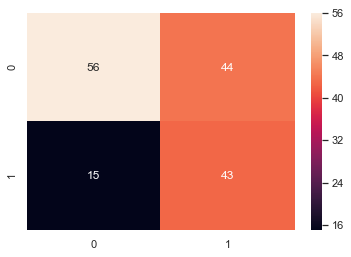

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_df['P/NP']
y_pred = test_df['Predicted by Syn Count / Len']
conmat = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(conmat)
sns.set()
sns.heatmap(cm_df, annot=True)

print('The classification report for Synonym Count / Len is')
print()
print(classification_report(y_true, y_pred))

The classification report for Related Count / Len is

             precision    recall  f1-score   support

          0       0.86      0.51      0.64       100
          1       0.51      0.86      0.64        58

avg / total       0.73      0.64      0.64       158



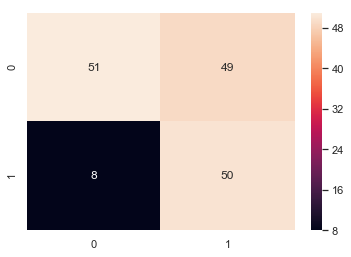

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_df['P/NP']
y_pred = test_df['Predicted by Rel Count / Len']
conmat = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(conmat)
sns.set()

sns.heatmap(cm_df, annot=True)

print('The classification report for Related Count / Len is')
print()
print(classification_report(y_true, y_pred))

In [46]:
def rel_and_syn_count_predict(s, threshold1=0.966738, threshold2=0.03089545164488603):
    rel_count = common_related(s)
    rel_count_len = rel_count / num_words(s)
    syn_count = common_syn(s)
    syn_count_len = syn_count / num_words(s)
    
    if rel_count_len >= threshold1 and syn_count_len >= threshold2:
        return 0
    else:
        return 1

test_df['Predicted by Rel and Syn Count / Len'] = test_df['Sentence'].apply(rel_and_syn_count_predict)

test_df.sample(5)

,Sentence,P/NP,Predicted by Rel Count / Len,Predicted by Syn Count / Len,Predicted by Rel and Syn Count / Len
55,A cabbage and celery walk into a bar and the c...,1,1,0,1
113,My parents were the same in the pulpit as they...,0,0,0,0
23,"After the accident, the juggler didn’t have th...",1,1,1,1
147,"I don't live with people, that's why my relati...",0,0,0,0
42,What do you call a fake noodle? An impasta.,1,1,1,1


The classification report for Related and Synonym Count / Len is

             precision    recall  f1-score   support

          0       0.89      0.41      0.56       100
          1       0.47      0.91      0.62        58

avg / total       0.74      0.59      0.58       158



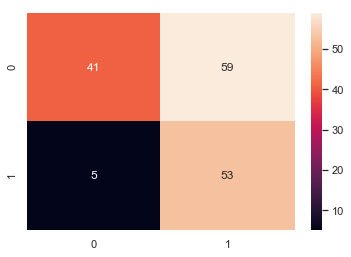

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_df['P/NP']
y_pred = test_df['Predicted by Rel and Syn Count / Len']
conmat = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(conmat)
sns.set()

sns.heatmap(cm_df, annot=True)

print('The classification report for Related and Synonym Count / Len is')
print()
print(classification_report(y_true, y_pred))

After some testing, it seems the most accurate result we can get comes when the threshold is set such that if the number of Synonym pairs or Related pairs are below the mean for Non-Puns, the sentence is a pun.

---

**Original Hypothesis**: Puns will have more related pairs of words than Non-Puns

**Finding**: In reality, it seems that the more related pairs of words a sentence has, the more likely that it is **not** a pun.

The reason our Hypothesis might have failed is because in reality, sentences tend to use very closely related words in order to describe situations. On the other hand, with puns, there *are* closely related pairs of words, but those words also tend to be very unrelated to other words.

---

For example:

Pun - "My **phone** has had to wear **glasses** ever since it lost its **contacts**."
* While **contacts** is related to both phone and glasses, phone and glasses are completely unrelated

Non-Pun - "**Life** is the **flower** for which **love** is the **honey**"
* Here, Life is related to Love and Flower is related to Honey. However, Life is also loosely related to Flower. 